# Отчет по проекту

In [257]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

pd.options.display.max_columns = 40
pd.options.display.max_rows = 85

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [258]:
df_train = pd.read_csv('./data/WORK_BANK_DATA_TRAIN.csv', encoding='cp1251',
                       engine='python', sep=';', index_col=None, header=0)
df_train

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,Yes,Yes,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,Yes,Yes,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,Yes,Yes,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,Yes,Yes,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,Yes,Yes,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,NaN,No,unknown,12,South East,6.0,42,Silver,Yes,Yes,Yes,No,2139.03,3155.41,4291.97,10,14,989.90,F,No,No
985473,1201048572,63.0,No,senior,33,South East,9.0,51,Tin,No,Yes,Yes,No,1916.91,3000.02,4045.15,11,30,884.63,F,No,No
985474,1201048573,68.0,No,senior,51,North,3.0,56,Gold,Yes,Yes,Yes,No,2053.00,3112.87,4292.20,8,16,922.66,M,No,No
985475,1201048574,45.0,No,middle,45,Midlands,1.0,54,Gold,Yes,Yes,Yes,No,2082.85,3143.77,4207.48,8,15,951.42,M,No,No


In [260]:
df_test = pd.read_csv('./data/WORK_BANK_DATA_TEST_SAMPLE.csv', encoding='cp1251',
                      engine='python', sep=';', index_col=None, header=0)
df_test

,ID,Age,Ind_House_hold,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender
0,1200000027,50.0,No,middle,22,South East,5.0,47,Tin,Yes,No,2062.32,2978.92,4054.13,7,17,950.45,M
1,1200000040,34.0,No,middle,47,South East,5.0,54,Tin,No,No,2000.73,3111.23,4265.02,5,17,982.29,F
2,1200000041,NaN,Yes,unknown,14,South East,28.0,52,Gold,Yes,No,1991.05,2990.26,4193.14,9,33,909.27,F
3,1200000071,61.0,No,senior,23,Midlands,3.0,54,Silver,Yes,No,2094.12,3089.97,4167.11,5,17,933.91,F
4,1200000080,44.0,No,middle,51,North,8.0,43,Silver,Yes,No,2034.41,2972.27,4165.87,5,17,917.13,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63093,1201048525,67.0,Yes,senior,45,Midlands,1.0,48,Silver,Yes,No,2037.32,3084.48,4236.37,12,33,904.46,M
63094,1201048529,75.0,No,senior,14,Midlands,9.0,46,Tin,Yes,No,2048.42,3072.78,4203.52,7,17,1026.79,F
63095,1201048544,54.0,No,middle,04,Midlands,2.0,53,Gold,Yes,No,2120.81,3167.97,4343.64,16,17,1017.48,U
63096,1201048557,41.0,Yes,middle,27,South West,13.0,44,Tin,Yes,No,2133.01,3201.82,4284.59,12,17,979.36,F


## 1. Подготовка данных

In [261]:
df_train.isna().sum()

ID                    0
Age               66958
Ind_Household         0
Age_group             0
District              0
Region                0
Lifetime          12608
Income                0
Segment               0
Ind_deposit           0
Ind_email             0
Ind_phone             0
Ind_salary            0
trans_6_month         0
trans_9_month         0
trans_12_month        0
amont_trans           0
amont_day_from        0
trans_3_month         0
Gender                0
Target1               0
Target2               0
dtype: int64

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

def build_displots_without_nan(data, columns, n_col=1, name='displots'):
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(20, 16))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        cur_data = data[~data[columns[0]].isna()][columns[0]]
        try:
            try:
                sns_plot = sns.distplot(cur_data, ax=ax, color='blue')
            except:
                sns_plot = sns.distplot(cur_data, ax=ax, color='red', kde_kws={'bw': 0.1})
        except:
            sns_plot = cur_data.hist(ax=axes[0], color='green')
        ax.set_title(columns[0])
        plt.show()
    elif n_col >= len(columns):
        fig, axes = plt.subplots(1, n_col, figsize=(20, 16 // n_col))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[idx], color='green')
            axes[idx].set_title(columns[idx])
        plt.show()
    else:
        m = n_col
        n = (len(columns) + m - 1) // m
        fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            i, j = idx // m, idx % m
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[i, j], color='green')
            axes[i, j].set_title(columns[idx])
        plt.show()
    return

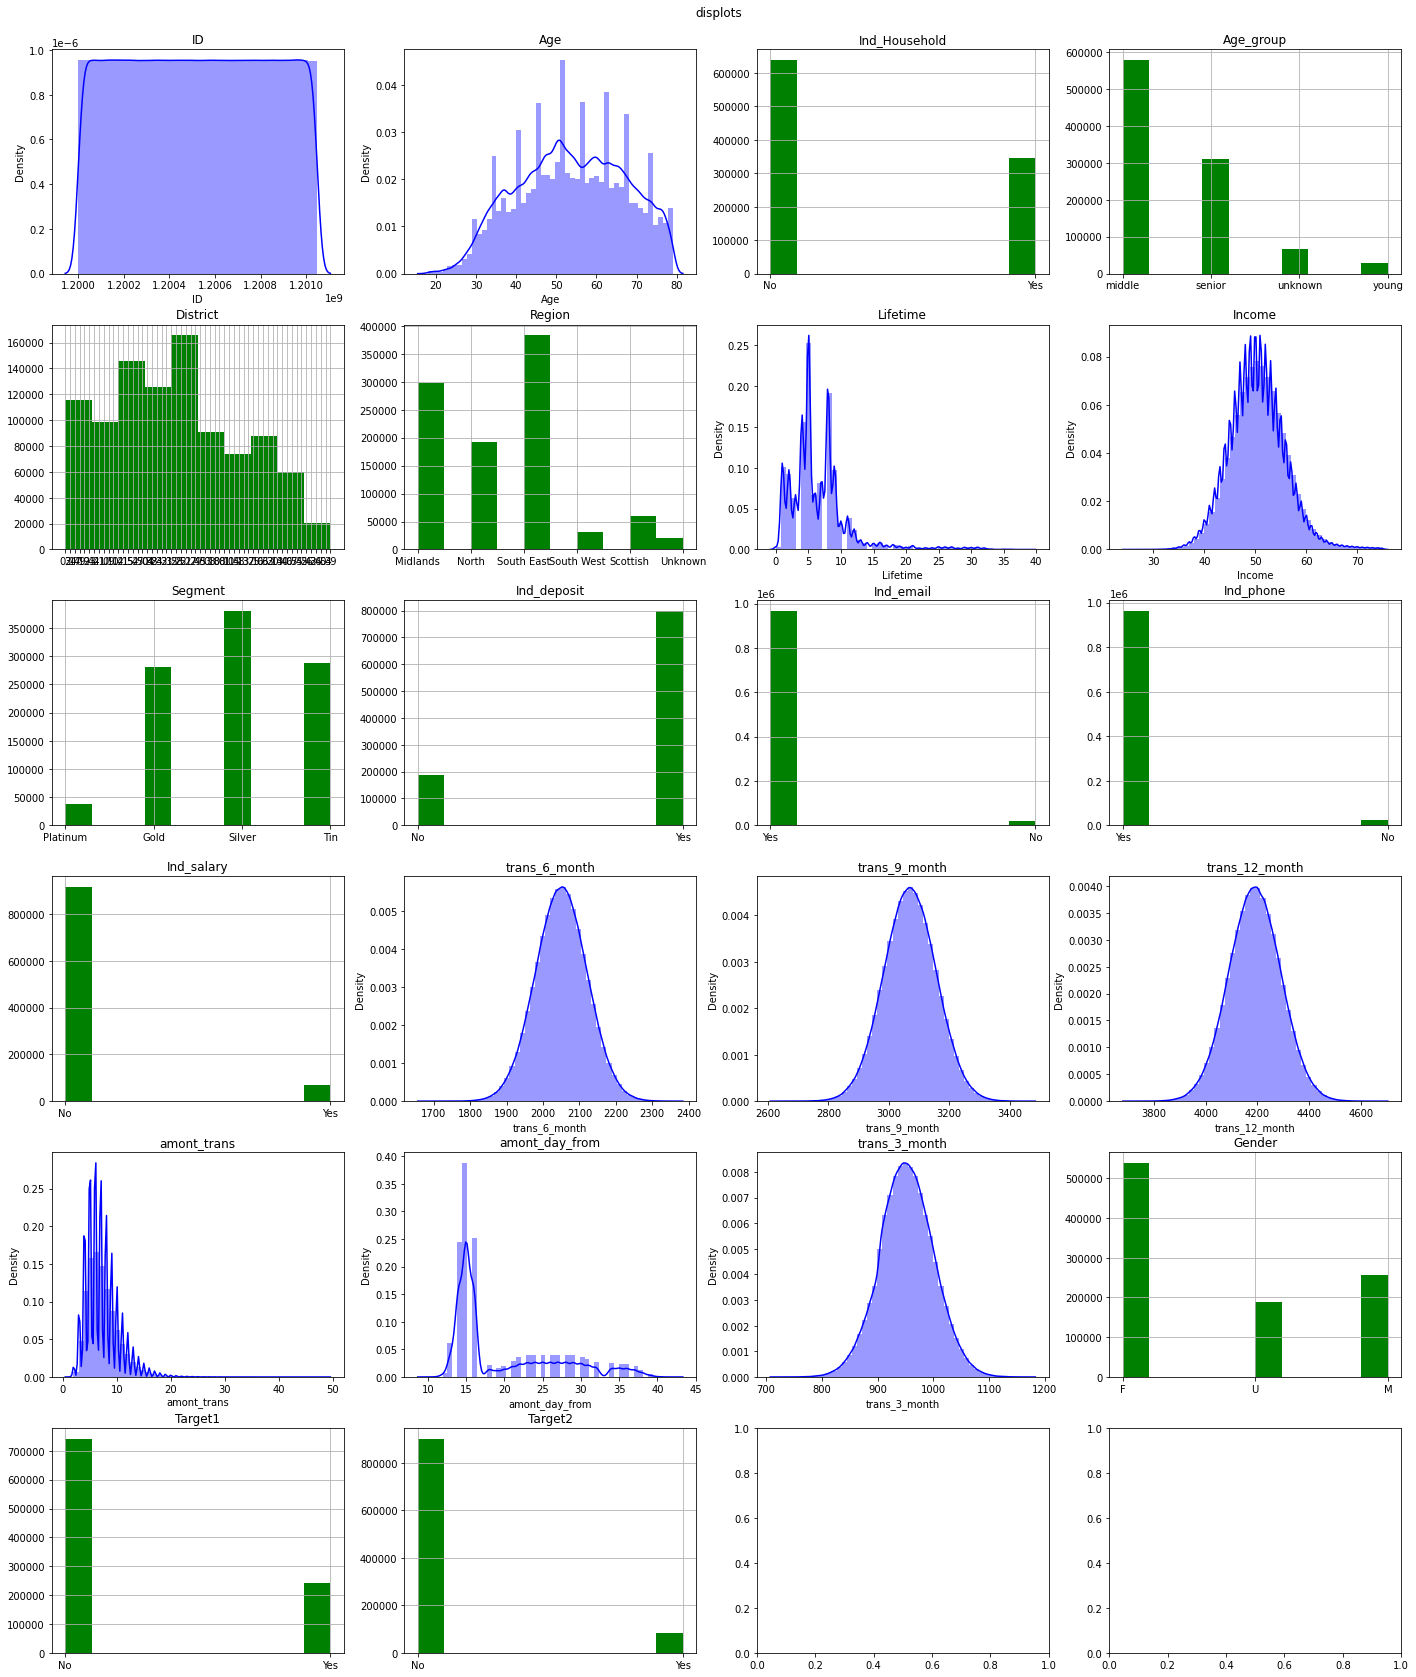

In [263]:
build_displots_without_nan(df_train, columns=df_train.columns, n_col=4, name='displots')

In [264]:
for age_group in df_train['Age_group'].unique():
    print('group:', age_group)
    print('count:', df_train[df_train['Age_group'] == age_group].shape[0])
    print('nan: ', df_train[df_train['Age_group'] == age_group]['Age'].isna().sum(), ' (',
          round(df_train[df_train['Age_group'] == age_group]['Age'].isna().sum() / 
                df_train[df_train['Age_group'] == age_group].shape[0] * 100, 2), '%)', sep='')
    print('displot: ', df_train[df_train['Age_group'] == age_group]['Age'].min(), '-', 
          df_train[df_train['Age_group'] == age_group]['Age'].max())
    print('-' * 20)

group: middle
count: 578936
nan: 0 (0.0%)
displot:  31.0 - 60.0
--------------------
group: senior
count: 310393
nan: 0 (0.0%)
displot:  61.0 - 79.0
--------------------
group: unknown
count: 66958
nan: 66958 (100.0%)
displot:  nan - nan
--------------------
group: young
count: 29190
nan: 0 (0.0%)
displot:  18.0 - 30.0
--------------------


In [274]:
print('num of zero transactions for 12 months =',
      df_train[df_train['trans_12_month'] == 0].shape[0])
print('num of zero transactions for  9 months =',
      df_train[df_train['trans_9_month'] == 0].shape[0])
print('num of zero transactions for  6 months =',
      df_train[df_train['trans_6_month'] == 0].shape[0])
print('num of zero transactions for  3 months =',
      df_train[df_train['trans_3_month'] == 0].shape[0])

num of zero transactions for 12 months = 0
num of zero transactions for  9 months = 0
num of zero transactions for  6 months = 0
num of zero transactions for  3 months = 0


In [271]:
print('9-12 :', df_train[df_train['trans_12_month'] == df_train['trans_9_month']].shape[0])
print('6-9  :', df_train[df_train['trans_9_month'] == df_train['trans_6_month']].shape[0])
print('3-6  :', df_train[df_train['trans_6_month'] == df_train['trans_3_month']].shape[0])

9-12 : 0
6-9  : 0
3-6  : 0


In [267]:
df_test.isna().sum()

ID                   0
Age               4369
Ind_House_hold       0
Age_group            0
District             0
Region               0
Lifetime           787
Income               0
Segment              0
Ind_deposit          0
Ind_salary           0
trans_6_month        0
trans_9_month        0
trans_12_month       0
amont_trans          0
amont_day_from       0
trans_3_month        0
Gender               0
dtype: int64

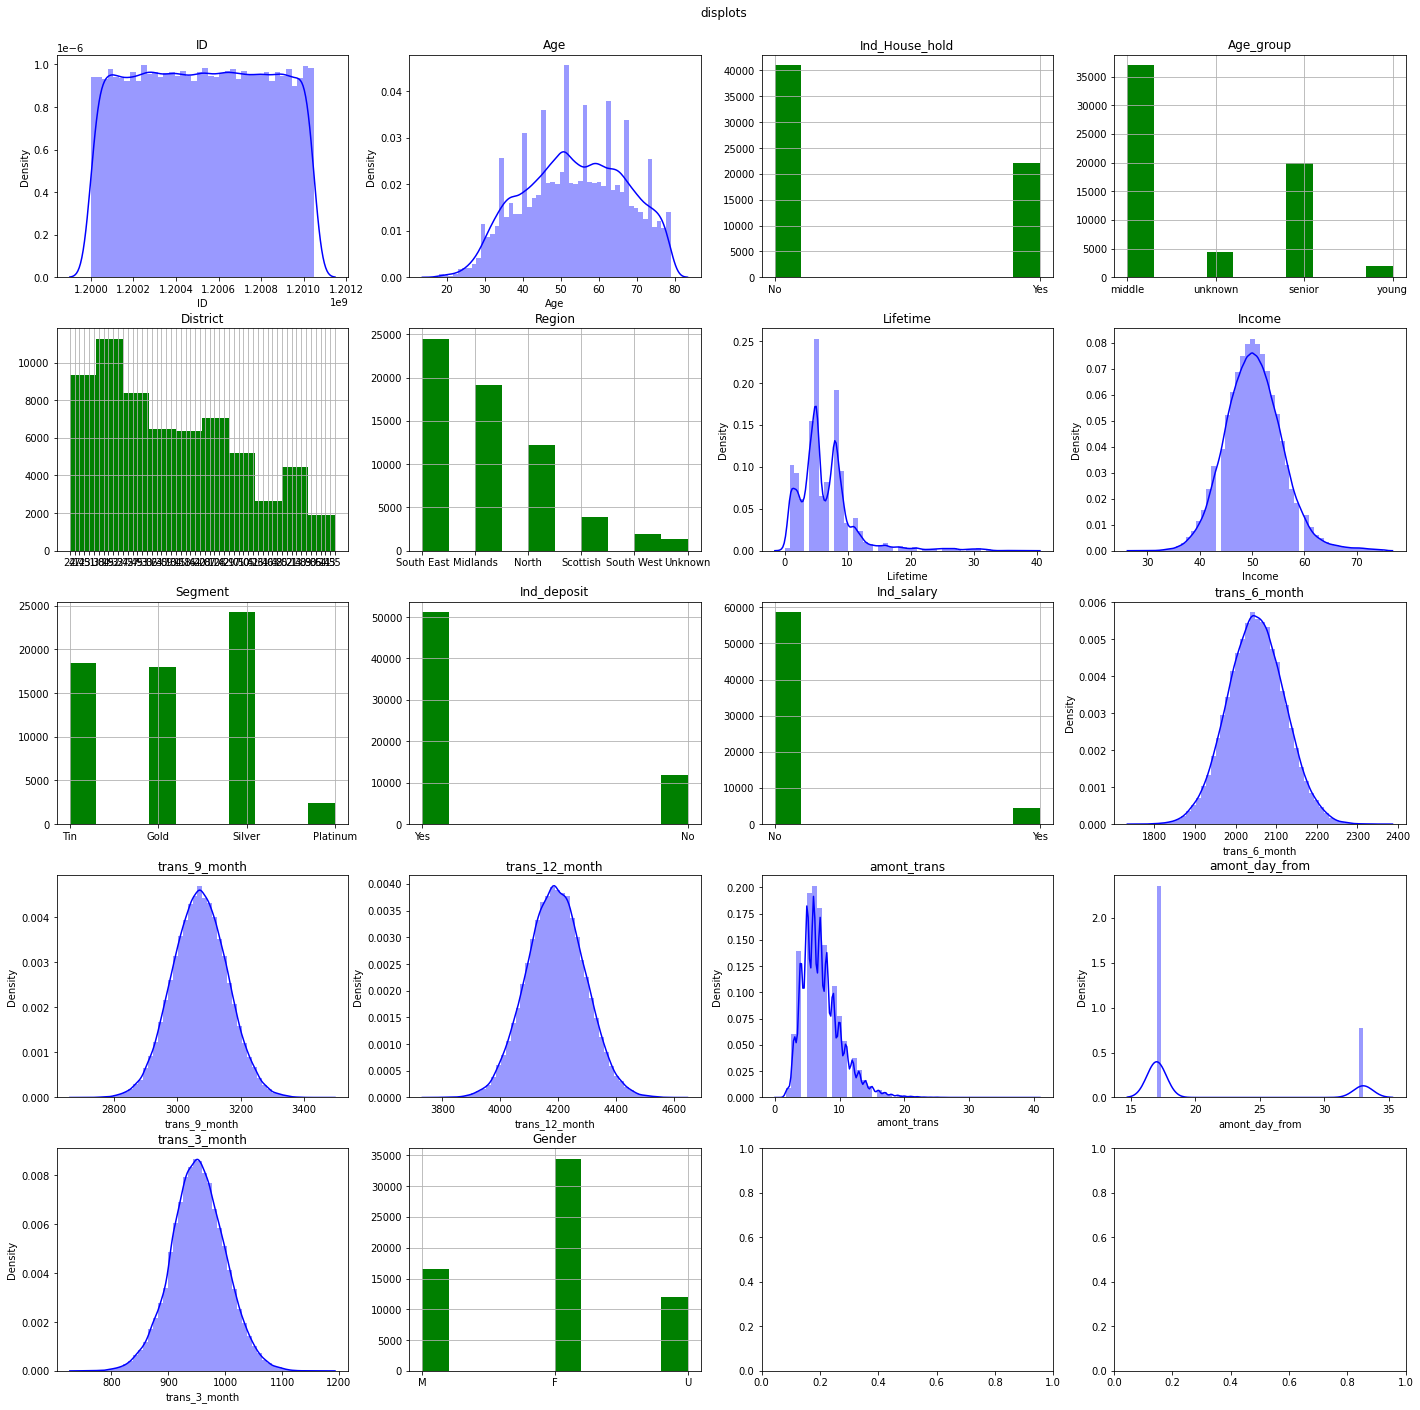

In [268]:
build_displots_without_nan(df_test, columns=df_test.columns, n_col=4, name='displots')

In [275]:
df_test['amont_day_from'].unique()

array([17, 33])

In [276]:
df_train['amont_day_from'].unique()

array([21, 14, 16, 15, 26, 30, 18, 32, 25, 28, 27, 23, 20, 24, 31, 19, 34,
       13, 22, 35, 37, 38, 36, 29, 39, 12, 11, 40, 41, 42, 10])

In [277]:
AGE_MEAN = df_train['Age'].mean()
LIFETIME_MEAN = df_train['Lifetime'].mean()

In [278]:
def do_one_hot_encoding(data, columns):
    for column in columns:
        tmp = pd.get_dummies(data[column], prefix=column)
        data = data.drop(columns=[column])
        data = data.join(tmp)
    return data

def transformation_yes_no_to_1_0(data, columns):
    for column in columns:
        data[column] = 1 * (data[column] == 'Yes')
    return data

def prepare_data(df, is_train=True):
    df['Age'].fillna(AGE_MEAN, inplace=True)
    df['Lifetime'].fillna(LIFETIME_MEAN, inplace=True)
    
    if not is_train:
        df.rename(columns={
            'Ind_House_hold' : 'Ind_Household'
        }, inplace=True)
    
    columns_to_delete = [
        'Ind_email',
        'Ind_phone'
    ]
    
    columns_to_label_encoding = [
        'Ind_Household',
        'Ind_deposit',                
        'Ind_salary'
    ]

    if is_train:
        df.drop(columns=columns_to_delete, inplace=True)
        columns_to_label_encoding += ['Target1', 'Target2']

    df = transformation_yes_no_to_1_0(df, columns=columns_to_label_encoding)
    
    columns_to_one_hot_encoding = [
        'Segment', 
        'Region', 
        'District', 
        'Age_group', 
        'Gender'
    ]
    
    df = do_one_hot_encoding(df, columns=columns_to_one_hot_encoding)
    
    return df

In [279]:
df_train = prepare_data(df_train)
df_test = prepare_data(df_test, False)

In [280]:
df_train

,ID,Age,Ind_Household,Lifetime,Income,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Target1,Target2,Segment_Gold,Segment_Platinum,Segment_Silver,Segment_Tin,Region_Midlands,...,District_44,District_45,District_46,District_47,District_48,District_49,District_50,District_51,District_52,District_53,District_54,District_55,District_U,Age_group_middle,Age_group_senior,Age_group_unknown,Age_group_young,Gender_F,Gender_M,Gender_U
0,1200000001,51.000000,0,3.0,53,0,0,2026.27,2964.23,4140.91,3,21,910.02,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1200000002,47.000000,0,2.0,51,0,0,2033.14,2969.30,4202.63,5,14,977.80,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1200000003,45.000000,0,6.0,50,0,0,2085.68,3080.13,4277.45,11,16,1001.54,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1200000004,78.000000,0,12.0,52,1,0,2026.58,3001.34,4105.54,3,15,980.78,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1200000005,57.000000,0,8.0,52,1,0,2142.23,3188.19,4401.98,2,26,1003.68,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,53.792106,0,6.0,42,1,0,2139.03,3155.41,4291.97,10,14,989.90,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
985473,1201048572,63.000000,0,9.0,51,0,0,1916.91,3000.02,4045.15,11,30,884.63,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
985474,1201048573,68.000000,0,3.0,56,1,0,2053.00,3112.87,4292.20,8,16,922.66,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
985475,1201048574,45.000000,0,1.0,54,1,0,2082.85,3143.77,4207.48,8,15,951.42,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [281]:
df_test

,ID,Age,Ind_Household,Lifetime,Income,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Segment_Gold,Segment_Platinum,Segment_Silver,Segment_Tin,Region_Midlands,Region_North,Region_Scottish,...,District_44,District_45,District_46,District_47,District_48,District_49,District_50,District_51,District_52,District_53,District_54,District_55,District_U,Age_group_middle,Age_group_senior,Age_group_unknown,Age_group_young,Gender_F,Gender_M,Gender_U
0,1200000027,50.000000,0,5.0,47,1,0,2062.32,2978.92,4054.13,7,17,950.45,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1200000040,34.000000,0,5.0,54,0,0,2000.73,3111.23,4265.02,5,17,982.29,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1200000041,53.792106,1,28.0,52,1,0,1991.05,2990.26,4193.14,9,33,909.27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1200000071,61.000000,0,3.0,54,1,0,2094.12,3089.97,4167.11,5,17,933.91,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1200000080,44.000000,0,8.0,43,1,0,2034.41,2972.27,4165.87,5,17,917.13,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63093,1201048525,67.000000,1,1.0,48,1,0,2037.32,3084.48,4236.37,12,33,904.46,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
63094,1201048529,75.000000,0,9.0,46,1,0,2048.42,3072.78,4203.52,7,17,1026.79,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
63095,1201048544,54.000000,0,2.0,53,1,0,2120.81,3167.97,4343.64,16,17,1017.48,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
63096,1201048557,41.000000,1,13.0,44,1,0,2133.01,3201.82,4284.59,12,17,979.36,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [282]:
print((set(df_train.columns) | set(df_test.columns)) - set(df_test.columns))
print((set(df_test.columns) | set(df_train.columns)) - set(df_train.columns))

{'Target1', 'Target2'}
set()


In [283]:
from sklearn.model_selection import train_test_split

X, y0, y1 = (df_train.drop(columns=['Target1', 'Target2']),
             df_train.loc[:, ['Target1']],
             df_train.loc[:, ['Target2']])

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# mutual_info_0 = mutual_info_classif(X, y0)
# mutual_info_1 = mutual_info_classif(X, y1)

In [ ]:
# print(len(mutual_info_0[mutual_info_0 < 1e-3]))
# print(len(mutual_info_1[mutual_info_1 < 1e-3]))

In [ ]:
# print(X.columns[mutual_info_0 < 1e-3])
# print(X.columns[mutual_info_1 < 1e-3])

In [284]:
columns_0_to_drop = [
    'ID', 'trans_6_month', 'trans_9_month', 'trans_12_month',
    'trans_3_month', 'Region_Scottish', 'Region_South West',
    'Region_Unknown', 'District_01', 'District_02', 'District_03',
    'District_04', 'District_05', 'District_06', 'District_07',
    'District_08', 'District_09', 'District_10', 'District_11',
    'District_12', 'District_13', 'District_14', 'District_15',
    'District_16', 'District_17', 'District_18', 'District_19',
    'District_20', 'District_21', 'District_22', 'District_23',
    'District_24', 'District_25', 'District_26', 'District_27',
    'District_28', 'District_29', 'District_30', 'District_31',
    'District_32', 'District_33', 'District_34', 'District_35',
    'District_36', 'District_37', 'District_38', 'District_39',
    'District_40', 'District_41', 'District_42', 'District_43',
    'District_44', 'District_45', 'District_46', 'District_47',
    'District_48', 'District_49', 'District_50', 'District_51',
    'District_52', 'District_53', 'District_54', 'District_55',
    'District_U', 'Age_group_unknown'
]

columns_1_to_drop = [
    'ID', 'Ind_salary', 'trans_6_month', 'trans_9_month', 'trans_12_month',
    'trans_3_month', 'Segment_Platinum', 'Region_Scottish',
    'Region_South West', 'Region_Unknown', 'District_01', 'District_02',
    'District_03', 'District_04', 'District_05', 'District_06',
    'District_07', 'District_08', 'District_09', 'District_10',
    'District_11', 'District_12', 'District_13', 'District_14',
    'District_15', 'District_16', 'District_17', 'District_18',
    'District_19', 'District_20', 'District_21', 'District_22',
    'District_23', 'District_24', 'District_25', 'District_26',
    'District_27', 'District_28', 'District_29', 'District_30',
    'District_31', 'District_32', 'District_33', 'District_34',
    'District_35', 'District_36', 'District_37', 'District_38',
    'District_39', 'District_40', 'District_41', 'District_42',
    'District_43', 'District_44', 'District_45', 'District_46',
    'District_47', 'District_48', 'District_49', 'District_50',
    'District_51', 'District_52', 'District_53', 'District_54',
    'District_55', 'District_U', 'Age_group_unknown'
]

In [285]:
X0 = X.copy()
X1 = X.copy()
X0.drop(columns=columns_0_to_drop)
X1.drop(columns=columns_1_to_drop)

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [286]:
assert X0_train.shape[0] == y0_train.shape[0], 'incorrect train shapes for 1 model'
assert X0_test.shape[0] == y0_test.shape[0], 'incorrect test shapes for 1 model'
assert X1_train.shape[0] == y1_train.shape[0], 'incorrect train shapes for 2 model'
assert X1_test.shape[0] == y1_test.shape[0], 'incorrect test shapes for 2 model'

## 2. Построение моделей

In [288]:
from datetime import datetime
from matplotlib import pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

In [289]:
results = pd.DataFrame(
    index=[
        ['Target1', 'Target1', 'Target1', 'Target1',
         'Target2', 'Target2', 'Target2', 'Target2'],
        ['f1 test', 'f1 train', 'AUC-ROC test', 'AUC-ROC train',
         'f1 test', 'f1 train', 'AUC-ROC test', 'AUC-ROC train']
    ],
    columns=[
        'Decision tree', 'Random forest', 
        'Logistic regression', 'XGBoost'
    ]
)

In [290]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600
        )
        tmin, tsec = divmod(temp_sec,60)

### Модели для Target1

#### Дерево решений

In [291]:
model = DecisionTreeClassifier()

parameters = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [1, 2, 4, 6, 8],
    'min_samples_leaf'  : [1, 3, 5, 7],
    'min_samples_split' : [1, 2, 4, 6, 8],
    'max_features'      : ['auto', 'log2', 'sqrt', None],
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=100,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X0, y0)
timer(start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] splitter=best, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  splitter=best, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini, score=0.767, total=   2.7s
[CV] splitter=best, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  splitter=best, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini, score=0.825, total=   1.9s
[CV] splitter=best, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV]  splitter=best, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini, score=0.765, total=   1.7s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=4, criterion=gini, score=0.679, total=   1.8s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=4, criterion=gini, score=0.759, total=   1.7s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=4, criterion=gini, score=0.809, total=   2.0s
[CV] splitter=best, min_samples_split=8, min_samples_leaf=1, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=b

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=8, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=8, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=8, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=8, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=8, criterion=gini, score=nan, total=   1.7s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=6, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=6, criterion=gini, score=0.582, total=   3.3s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=6, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=6, criterion=gini, score=0.789, total=   2.1s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=6, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=auto, max_depth=6, criterion=gini, score=0.879, total=   2.5s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=None, max_depth=2, criterion=entropy 
[CV]  splitte

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=auto, max_depth=1, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=auto, max_depth=1, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=auto, max_depth=1, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=auto, max_depth=1, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=auto, max_depth=1, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.753, total=   1.6s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.753, total=   1.5s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.764, total=   2.4s
[CV] splitter=random, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=4, criterion=gini

[CV]  splitter=best, min_samples_split=6, min_samples_leaf=5, max_features=auto, max_depth=8, criterion=entropy, score=0.809, total=   2.8s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=4, criterion=gini, score=0.564, total=   2.1s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=4, criterion=gini, score=0.823, total=   2.1s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=4, criterion=gini, score=0.771, total=   2.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=8, criterion=gini 
[CV]  splitte

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=log2, max_depth=1, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=log2, max_depth=1, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=log2, max_depth=1, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=log2, max_depth=1, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=7, max_features=log2, max_depth=1, criterion=gini, score=nan, total=   1.5s
[CV] splitter=random, min_samples_split=8, min_samples_leaf=1, max_features=None, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=8, min_samples_leaf=1, max_features=None, max_depth=2, criterion=gini, score=0.788, total=   2.9s
[CV] splitter=random, min_samples_split=8, min_samples_leaf=1, max_features=None, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=8, min_samples_leaf=1, max_features=None, max_depth=2, criterion=gini, score=0.793, total=   4.0s
[CV] splitter=random, min_samples_split=8, min_samples_leaf=1, max_features=None, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=8, min_samples_leaf=1, max_features=None, max_depth=2, criterion=gini, score=0.756, total=   2.5s
[CV] splitter=random, min_samples_split=6, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=entropy 
[

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=4, criterion=gini, score=nan, total=   1.2s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=4, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=4, criterion=gini, score=nan, total=   1.2s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=4, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=4, criterion=gini, score=nan, total=   1.2s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=2, criterion=gini, score=0.753, total=   1.8s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=2, criterion=gini, score=0.753, total=   2.2s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=2, criterion=gini, score=0.753, total=   1.8s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=None, max_depth=6, criterion=gini 
[CV]  

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=8, criterion=gini, score=nan, total=   1.2s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=8, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=8, criterion=gini, score=nan, total=   1.3s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=8, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=5, max_features=log2, max_depth=8, criterion=gini, score=nan, total=   1.1s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entropy 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entropy, score=nan, total=   1.1s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entropy 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entropy, score=nan, total=   1.1s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entropy 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entropy, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini, score=0.753, total=   1.3s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini, score=0.753, total=   1.9s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini, score=0.753, total=   1.7s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=8, criterion=entro

[CV]  splitter=best, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=4, criterion=gini, score=0.753, total=   1.7s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=7, max_features=sqrt, max_depth=6, criterion=entropy 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=7, max_features=sqrt, max_depth=6, criterion=entropy, score=0.760, total=   2.4s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=7, max_features=sqrt, max_depth=6, criterion=entropy 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=7, max_features=sqrt, max_depth=6, criterion=entropy, score=0.757, total=   2.4s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=7, max_features=sqrt, max_depth=6, criterion=entropy 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=7, max_features=sqrt, max_depth=6, criterion=entropy, score=0.753, total=   2.6s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=8, cr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=4, criterion=gini 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=4, criterion=gini, score=0.753, total=   1.5s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=4, criterion=gini 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=4, criterion=gini, score=0.754, total=   1.7s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=4, criterion=gini 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=4, criterion=gini, score=0.753, total=   1.6s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=None, max_depth=2, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=None, max_depth=2, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=None, max_depth=2, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=None, max_depth=2, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=None, max_depth=2, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=5, max_features=None, max_depth=2, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=8, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=gini 
[CV]  splitter=random, min_samples_split=8, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=gini, score=0.753, total=   1.3s
[CV] splitter=random, min_samples_split=8, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=gini 
[CV]  splitter=random, min_samples_split=8, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=gini, score=0.753, total=   1.3s
[CV] splitter=random, min_samples_split=8, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=gini 
[CV]  splitter=random, min_samples_split=8, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=gini, score=0.753, total=   1.7s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=8, criterion=entropy 
[

[CV]  splitter=random, min_samples_split=6, min_samples_leaf=1, max_features=log2, max_depth=6, criterion=gini, score=0.753, total=   1.5s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=8, criterion=entropy 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=8, criterion=entropy, score=0.756, total=   2.0s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=8, criterion=entropy 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=8, criterion=entropy, score=0.824, total=   2.0s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=8, criterion=entropy 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=8, criterion=entropy, score=0.764, total=   1.9s
[CV] splitter=random, min_samples_split=6, min_samples_leaf=3, max_features=auto, max_depth=1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=entropy, score=nan, total=   1.6s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=entropy 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=entropy, score=nan, total=   1.3s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=entropy 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=entropy, score=nan, total=   1.8s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=2, criterion=entropy 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=2, criterion=entropy, score=0.758, total=   2.0s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=2, criterion=entropy 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=2, criterion=entropy, score=0.753, total=   2.2s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=2, criterion=entropy 
[CV]  splitter=random, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=2, criterion=entropy, score=0.768, total=   1.6s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=8, c

[CV]  splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=8, criterion=gini, score=0.899, total=  13.3s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=4, criterion=gini, score=0.765, total=   1.8s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=4, criterion=gini, score=0.769, total=   1.9s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=4, criterion=gini 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=4, criterion=gini, score=0.757, total=   2.8s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini, score=nan, total=   1.2s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=2, criterion=entropy 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=2, criterion=entropy, score=0.877, total=   3.4s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=2, criterion=entropy 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=2, criterion=entropy, score=0.878, total=   3.4s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=2, criterion=entropy 
[CV]  splitter=best, min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=2, criterion=entropy, score=0.877, total=   3.4s
[CV] splitter=best, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=7, max_features=None, max_depth=4, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=7, max_features=None, max_depth=4, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=7, max_features=None, max_depth=4, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=1, min_samples_leaf=7, max_features=None, max_depth=4, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=random, min_samples_split=1, min_samples_leaf=7, max_features=None, max_depth=4, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this trai

[CV]  splitter=best, min_samples_split=1, min_samples_leaf=3, max_features=None, max_depth=6, criterion=gini, score=nan, total=   1.0s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=gini, score=0.753, total=   1.4s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=gini, score=0.753, total=   1.5s
[CV] splitter=random, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=gini 
[CV]  splitter=random, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=2, criterion=gini, score=0.753, total=   1.4s
[CV] splitter=random, min_samples_split=6, min_samples_leaf=5, max_features=log2, max_depth=8, criterion=gini 
[CV]

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.0min finished


In [292]:
tuning_model.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': None,
 'max_depth': 6,
 'criterion': 'gini'}

In [293]:
tuning_model.best_score_

0.8988469539528352

In [294]:
dtc0 = DecisionTreeClassifier(
    splitter = 'best',
    min_samples_split = 4,
    min_samples_leaf = 7,
    max_features = None,
    max_depth = 6,
    criterion = 'gini'
)
dtc0 = dtc0.fit(X0_train, y0_train)

y0_train_pred = dtc0.predict(X0_train)
y0_test_pred = dtc0.predict(X0_test)

probs0_test = dtc0.predict_proba(X0_test)
probs0_train = dtc0.predict_proba(X0_train)

preds_test_dtc0 = probs0_test[:, 1]
preds_train_dtc0 = probs0_train[:, 1]

Decision tree
f1 test          0.764572
f1 train         0.763685
AUC-ROC test     0.925289
AUC-ROC train    0.925234
Name: Decision tree, dtype: object


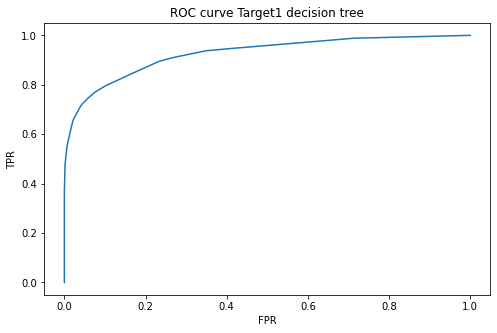

In [295]:
print('Decision tree')

results.loc[('Target1', 'f1 test'), 'Decision tree'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'Decision tree'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'Decision tree'] = roc_auc_score(y0_test, preds_test_dtc0)
results.loc[('Target1', 'AUC-ROC train'), 'Decision tree'] = roc_auc_score(y0_train, preds_train_dtc0)

print(results.loc['Target1', 'Decision tree'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_dtc0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 decision tree')
plt.show()

#### Случайный лес

In [296]:
model = RandomForestClassifier()

parameters = {
    #'bootstrap'         : [True, False],
    'max_depth'         : [3, 5, 10, None],
    #'criterion'         : ['gini', 'entropy'],
    #'min_samples_leaf'  : [1, 2, 4],
    #'max_features'      : ['auto', 'log2', None],
    'n_estimators'      : [50, 100, 200, 500]
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=10,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X0, y0)
timer(start_time)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=50, max_depth=3 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ........ n_estimators=50, max_depth=3, score=0.761, total=  31.5s
[CV] n_estimators=50, max_depth=3 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.6s remaining:    0.0s
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ........ n_estimators=50, max_depth=3, score=0.757, total=  33.9s
[CV] n_estimators=50, max_depth=3 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ........ n_estimators=50, max_depth=3, score=0.794, total=  28.2s
[CV] n_estimators=100, max_depth=3 ...................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....... n_estimators=100, max_depth=3, score=0.792, total=  54.9s
[CV] n_estimators=100, max_depth=3 ...................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....... n_estimators=100, max_depth=3, score=0.757, total= 1.1min
[CV] n_estimators=100, max_depth=3 ...................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....... n_estimators=100, max_depth=3, score=0.770, total=  58.5s
[CV] n_estimators=100, max_depth=5 ...................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....... n_estimators=100, max_depth=5, score=0.852, total= 1.6min
[CV] n_estimators=100, max_depth=5 ...................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....... n_estimators=100, max_depth=5, score=0.820, total= 1.5min
[CV] n_estimators=100, max_depth=5 ...................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....... n_estimators=100, max_depth=5, score=0.869, total= 1.6min
[CV] n_estimators=200, max_depth=None ................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [242]:
rfc0 = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    criterion='gini',
    n_estimators=100,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='auto',
    random_state=42,
)

rfc0 = rfc0.fit(X0_train, y0_train)

y0_train_pred = rfc0.predict(X0_train)
y0_test_pred = rfc0.predict(X0_test)

probs0_test = rfc0.predict_proba(X0_test)
probs0_train = rfc0.predict_proba(X0_train)

preds_test_rfc0 = probs0_test[:, 1]
preds_train_rfc0 = probs0_train[:, 1]

<ipython-input-242-e360418ca2a9>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc0 = rfc0.fit(X0_train, y0_train)


In [ ]:
print('Random forest')

results.loc[('Target1', 'f1 test'), 'Random forest'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'Random forest'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'Random forest'] = roc_auc_score(y0_test, preds_test_rfc0)
results.loc[('Target1', 'AUC-ROC train'), 'Random forest'] = roc_auc_score(y0_train, preds_train_rfc0)

print(results.loc['Target1', 'Random forest'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_rfc0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 random forest')
plt.show()

#### Логистическая регрессия

In [244]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000)),
])

lr0 = pipeline.fit(X0_train, y0_train)

y0_train_pred = lr0.predict(X0_train)
y0_test_pred = lr0.predict(X0_test)

probs0_test = lr0.predict_proba(X0_test)
probs0_train = lr0.predict_proba(X0_train)

preds_test_lr0 = probs0_test[:, 1]
preds_train_lr0 = probs0_train[:, 1]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Logistic regression
f1 test          0.552433
f1 train         0.548956
AUC-ROC test     0.831656
AUC-ROC train    0.829783
Name: Logistic regression, dtype: object


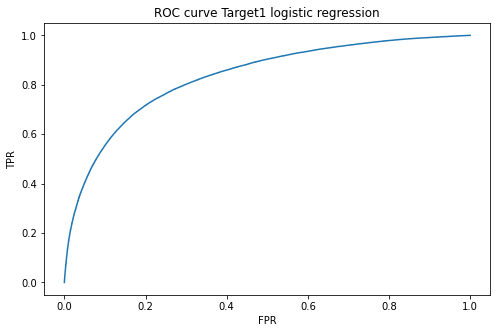

In [245]:
print('Logistic regression')

results.loc[('Target1', 'f1 test'), 'Logistic regression'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'Logistic regression'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'Logistic regression'] = roc_auc_score(y0_test, preds_test_lr0)
results.loc[('Target1', 'AUC-ROC train'), 'Logistic regression'] = roc_auc_score(y0_train, preds_train_lr0)

print(results.loc['Target1', 'Logistic regression'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_lr0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 logistic regression')
plt.show()

#### XGBoost

In [ ]:
params = {
    "learning_rate":    hp.choice('learning_rate', np.arange(0.05, 0.21, 0.05)),
    "max_depth":        hp.choice('max_depth', np.arange(1, 5, 1, dtype=int)),
    "min_child_weight": hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    "gamma":            hp.choice('gamma', np.arange(0.0, 0.5, 0.1)),
    "colsample_bytree": hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    "subsample":        hp.choice('subsample', np.arange(0.8, 1.01, 0.05)),
    "n_estimators":     1000,
}

fit_params = {
    'eval_metric':           'auc',
    'eval_set':              [(X0_train, y0_train), (X0_test, y0_test)],
    'early_stopping_rounds': 10,
    'verbose':               False,
}

def objective(space):
    clf = xgboost.XGBClassifier(
        verbosity         = 0,
        use_label_encoder = False,
        learning_rate     = space['learning_rate'],
        max_depth         = space['max_depth'],
        min_child_weight  = space['min_child_weight'],
        gamma             = space['gamma'],
        colsample_bytree  = space['colsample_bytree'],
        subsample         = space['subsample'],
        n_estimators      = space['n_estimators'], 
    )
    print(f'''
------------------------
learning_rate    = {space['learning_rate']},
max_depth        = {space['max_depth']},
min_child_weight = {space['min_child_weight']},
gamma            = {space['gamma']},
colsample_bytree = {space['colsample_bytree']},
subsample        = {space['subsample']},
n_estimators     = {space['n_estimators']},
------------------------
''')
    
    clf.fit(X0_train, y0_train, **fit_params)
    
    y0_pred = clf.predict(X0_test)
    preds = clf.predict_proba(X0_test)[:,1]
    
    accuracy = accuracy_score(y0_test, y0_pred)
    roc_auc = roc_auc_score(y_test, preds)

    print(f"accuracy = {accuracy}, roc_auc = {roc_auc}")
    
    return {'loss': -roc_auc, 'status': STATUS_OK}

In [246]:
xgbc0 = xgboost.XGBClassifier(
    use_label_encoder=False,
    n_estimators=100,
    objective='binary:logistic',
    max_depth=3,
    eta=0.1,
)

xgbc0.fit(
    X0_train, y0_train,
    early_stopping_rounds=10,
    eval_metric='auc',
    eval_set=[(X0_test, y0_test)],
    verbose=True,
)

y0_train_pred = xgbc0.predict(X0_train)
y0_test_pred = xgbc0.predict(X0_test)

probs0_test = xgbc0.predict_proba(X0_test)
probs0_train = xgbc0.predict_proba(X0_train)

preds_test_xgbc0 = probs0_test[:, 1]
preds_train_xgbc0 = probs0_train[:, 1]

[0]	validation_0-auc:0.89988
[1]	validation_0-auc:0.90335
[2]	validation_0-auc:0.90365
[3]	validation_0-auc:0.90452
[4]	validation_0-auc:0.90460
[5]	validation_0-auc:0.91157
[6]	validation_0-auc:0.91404
[7]	validation_0-auc:0.91317
[8]	validation_0-auc:0.91280
[9]	validation_0-auc:0.91289
[10]	validation_0-auc:0.91375
[11]	validation_0-auc:0.91286
[12]	validation_0-auc:0.91519
[13]	validation_0-auc:0.91487
[14]	validation_0-auc:0.91883
[15]	validation_0-auc:0.91917
[16]	validation_0-auc:0.91936
[17]	validation_0-auc:0.92025
[18]	validation_0-auc:0.92102
[19]	validation_0-auc:0.92126
[20]	validation_0-auc:0.92161
[21]	validation_0-auc:0.92207
[22]	validation_0-auc:0.92205
[23]	validation_0-auc:0.92259
[24]	validation_0-auc:0.92301
[25]	validation_0-auc:0.92333
[26]	validation_0-auc:0.92411
[27]	validation_0-auc:0.92443
[28]	validation_0-auc:0.92460
[29]	validation_0-auc:0.92481
[30]	validation_0-auc:0.92577
[31]	validation_0-auc:0.92588
[32]	validation_0-auc:0.92592
[33]	validation_0-au

XGBoost
f1 test          0.764572
f1 train         0.763685
AUC-ROC test     0.931504
AUC-ROC train    0.931292
Name: XGBoost, dtype: object


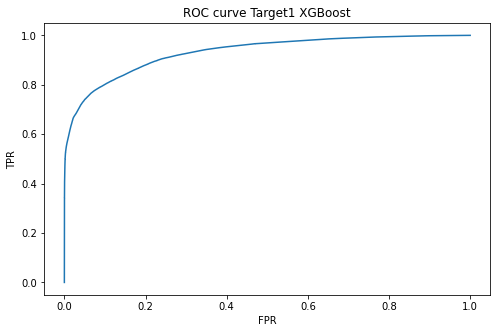

In [312]:
print('XGBoost')

results.loc[('Target1', 'f1 test'), 'XGBoost'] = f1_score(y0_test, y0_test_pred)
results.loc[('Target1', 'f1 train'), 'XGBoost'] = f1_score(y0_train, y0_train_pred)
results.loc[('Target1', 'AUC-ROC test'), 'XGBoost'] = roc_auc_score(y0_test, preds_test_xgbc0)
results.loc[('Target1', 'AUC-ROC train'), 'XGBoost'] = roc_auc_score(y0_train, preds_train_xgbc0)

print(results.loc['Target1', 'XGBoost'])

fpr0, tpr0, _ = roc_curve(y0_test, preds_test_xgbc0, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr0, tpr0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target1 XGBoost')
plt.show()

### Модели для Target2

#### Дерево решений

In [ ]:
model = DecisionTreeClassifier()

parameters = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [2, 4, 5, 6, 7, 8],
    'min_samples_leaf'  : [1, 3, 5, 7],
    'min_samples_split' : [1, 2, 4, 6, 8],
    'max_features'      : ['auto', 'log2', 'sqrt', None],
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=100,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X1, y1)
timer(start_time)

In [235]:
tuning_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

In [236]:
tuning_model.best_score_

0.7255990199525133

In [248]:
dtc1 = DecisionTreeClassifier(
    splitter = 'best',
    min_samples_split = 4,
    min_samples_leaf = 7,
    max_features = None,
    max_depth = 6,
    criterion = 'gini'
)
dtc1 = dtc1.fit(X1_train, y1_train)

y1_train_pred = dtc1.predict(X1_train)
y1_test_pred = dtc1.predict(X1_test)

probs1_test = dtc1.predict_proba(X1_test)
probs1_train = dtc1.predict_proba(X1_train)

preds_test_dtc1 = probs1_test[:, 1]
preds_train_dtc1 = probs1_train[:, 1]

Decision tree
f1 test          0.441479
f1 train         0.439915
AUC-ROC test      0.92256
AUC-ROC train    0.922415
Name: Decision tree, dtype: object


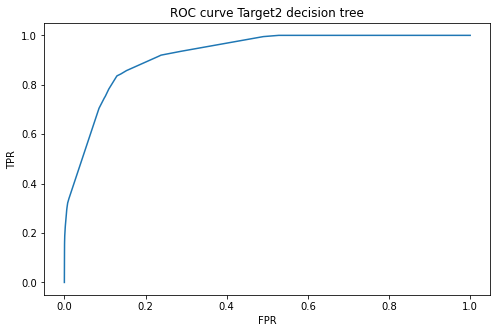

In [249]:
print('Decision tree')

results.loc[('Target2', 'f1 test'), 'Decision tree'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'Decision tree'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'Decision tree'] = roc_auc_score(y1_test, preds_test_dtc1)
results.loc[('Target2', 'AUC-ROC train'), 'Decision tree'] = roc_auc_score(y1_train, preds_train_dtc1)

print(results.loc['Target2', 'Decision tree'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_dtc1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 decision tree')
plt.show()

#### Случайный лес

In [ ]:
model = RandomForestClassifier()

parameters = {
    #'bootstrap'         : [True, False],
    'max_depth'         : [3, 5, 10, None],
    #'criterion'         : ['gini', 'entropy'],
    #'min_samples_leaf'  : [1, 2, 4],
    #'max_features'      : ['auto', 'log2', None],
    'n_estimators'      : [50, 100, 200, 500]
}

tuning_model = RandomizedSearchCV(
    model, parameters, n_iter=10,
    cv=3, verbose=3, random_state=42
)

start_time = timer(None)
tuning_model.fit(X1, y1)
timer(start_time)

In [250]:
rfc1 = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    criterion='gini',
    n_estimators=100,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='auto',
    random_state=42,
)

rfc1 = rfc1.fit(X1_train, y1_train)

y1_train_pred = rfc1.predict(X1_train)
y1_test_pred = rfc1.predict(X1_test)

probs1_test = rfc1.predict_proba(X1_test)
probs1_train = rfc1.predict_proba(X1_train)

preds_test_rfc1 = probs1_test[:, 1]
preds_train_rfc1 = probs1_train[:, 1]

<ipython-input-250-8cbb45d3fe60>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1 = rfc1.fit(X1_train, y1_train)


Random forest
f1 test                    0
f1 train         3.37041e-05
AUC-ROC test         0.87188
AUC-ROC train       0.877887
Name: Random forest, dtype: object


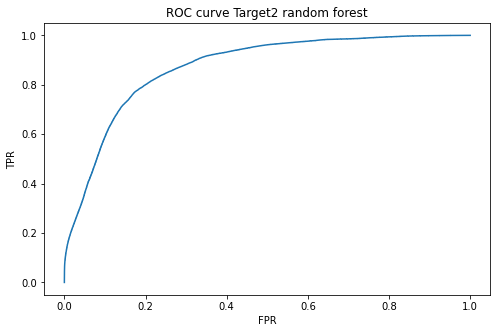

In [251]:
print('Random forest')

results.loc[('Target2', 'f1 test'), 'Random forest'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'Random forest'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'Random forest'] = roc_auc_score(y1_test, preds_test_rfc1)
results.loc[('Target2', 'AUC-ROC train'), 'Random forest'] = roc_auc_score(y1_train, preds_train_rfc1)

print(results.loc['Target2', 'Random forest'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_rfc1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 random forest')
plt.show()

#### Логистическая регрессия

In [302]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression()),
])

lr1 = pipeline.fit(X1_train, y1_train)

y1_train_pred = lr1.predict(X1_train)
y1_test_pred = lr1.predict(X1_test)

probs1_test = lr1.predict_proba(X1_test)
probs1_train = lr1.predict_proba(X1_train)

preds_test_lr1 = probs1_test[:, 1]
preds_train_lr1 = probs1_train[:, 1]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Logistic regression
f1 test           0.0058438
f1 train         0.00606555
AUC-ROC test       0.757371
AUC-ROC train      0.755901
Name: Logistic regression, dtype: object


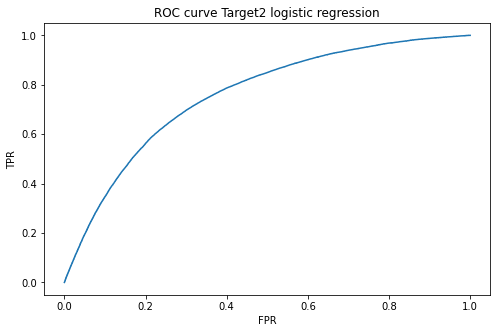

In [303]:
print('Logistic regression')

results.loc[('Target2', 'f1 test'), 'Logistic regression'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'Logistic regression'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'Logistic regression'] = roc_auc_score(y1_test, preds_test_lr1)
results.loc[('Target2', 'AUC-ROC train'), 'Logistic regression'] = roc_auc_score(y1_train, preds_train_lr1)

print(results.loc['Target2', 'Logistic regression'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_lr1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 logistic regression')
plt.show()

#### XGBoost

In [254]:
xgbc1 = xgboost.XGBClassifier(
    use_label_encoder=False,
    n_estimators=100,
    objective='binary:logistic',
    max_depth=3,
    eta=0.1,
)

xgbc1.fit(
    X1_train, y1_train,
    early_stopping_rounds=10,
    eval_metric='auc',
    eval_set=[(X1_test, y1_test)],
    verbose=True,
)

y1_train_pred = xgbc1.predict(X1_train)
y1_test_pred = xgbc1.predict(X1_test)

probs1_test = xgbc1.predict_proba(X1_test)
probs1_train = xgbc1.predict_proba(X1_train)

preds_test_xgbc1 = probs1_test[:, 1]
preds_train_xgbc1 = probs1_train[:, 1]

[0]	validation_0-auc:0.84303
[1]	validation_0-auc:0.84587
[2]	validation_0-auc:0.84663
[3]	validation_0-auc:0.84611
[4]	validation_0-auc:0.85198
[5]	validation_0-auc:0.84906
[6]	validation_0-auc:0.85067
[7]	validation_0-auc:0.84993
[8]	validation_0-auc:0.85294
[9]	validation_0-auc:0.85238
[10]	validation_0-auc:0.85544
[11]	validation_0-auc:0.85565
[12]	validation_0-auc:0.85644
[13]	validation_0-auc:0.87401
[14]	validation_0-auc:0.88259
[15]	validation_0-auc:0.88184
[16]	validation_0-auc:0.88865
[17]	validation_0-auc:0.88967
[18]	validation_0-auc:0.89421
[19]	validation_0-auc:0.89748
[20]	validation_0-auc:0.89916
[21]	validation_0-auc:0.90256
[22]	validation_0-auc:0.90649
[23]	validation_0-auc:0.90739
[24]	validation_0-auc:0.90889
[25]	validation_0-auc:0.91005
[26]	validation_0-auc:0.91243
[27]	validation_0-auc:0.91434
[28]	validation_0-auc:0.91621
[29]	validation_0-auc:0.91623
[30]	validation_0-auc:0.91619
[31]	validation_0-auc:0.91703
[32]	validation_0-auc:0.91827
[33]	validation_0-au

XGBoost
f1 test          0.744977
f1 train         0.747651
AUC-ROC test     0.967104
AUC-ROC train    0.967419
Name: XGBoost, dtype: object


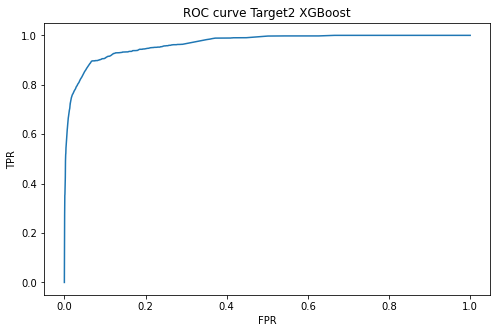

In [255]:
print('XGBoost')

results.loc[('Target2', 'f1 test'), 'XGBoost'] = f1_score(y1_test, y1_test_pred)
results.loc[('Target2', 'f1 train'), 'XGBoost'] = f1_score(y1_train, y1_train_pred)
results.loc[('Target2', 'AUC-ROC test'), 'XGBoost'] = roc_auc_score(y1_test, preds_test_xgbc1)
results.loc[('Target2', 'AUC-ROC train'), 'XGBoost'] = roc_auc_score(y1_train, preds_train_xgbc1)

print(results.loc['Target2', 'XGBoost'])

fpr1, tpr1, _ = roc_curve(y1_test, preds_test_xgbc1, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Target2 XGBoost')
plt.show()

In [316]:
results

Decision tree Random forest Logistic regression  \
Target1 f1 test            0.764572      0.756127            0.542184   
        f1 train           0.763685      0.744734            0.554813   
        AUC-ROC test       0.925289      0.913827            0.824911   
        AUC-ROC train      0.925234      0.918745            0.837268   
Target2 f1 test            0.583251      0.585236            0.323123   
        f1 train           0.598282      0.591393            0.351235   
        AUC-ROC test       0.902936      0.899321            0.752323   
        AUC-ROC train      0.899928      0.905734            0.762139   

                        XGBoost  
Target1 f1 test        0.784163  
        f1 train       0.793772  
        AUC-ROC test   0.931526  
        AUC-ROC train  0.931921  
Target2 f1 test        0.744976  
        f1 train       0.752344  
        AUC-ROC test   0.917158  
        AUC-ROC train  0.927457

Таким образом, **XGBoost** – лучшая модель, с точки зрения качества по AUC-ROC и F1 для обоих таргетов.